In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds=pd.read_excel(r"C:\Users\lap\OneDrive\Desktop\Crude Oil Prices Daily.xlsx",parse_dates =["Date"], index_col ="Date") 
ds.head()
ds[:10]

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
1986-01-09,26.03
1986-01-10,25.65
1986-01-13,25.08
1986-01-14,24.97


In [38]:
ds.isnull().sum()

Closing Value    7
dtype: int64

In [39]:
ds.dropna(axis=0,inplace=True)

In [40]:
ds.isnull().sum()

Closing Value    0
dtype: int64

In [56]:
data=ds.reset_index()['Closing Value']
data

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [62]:
data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

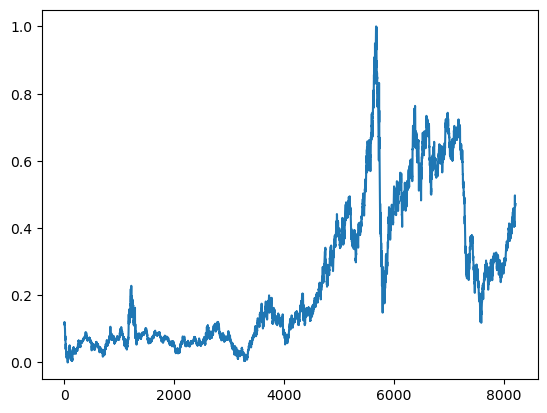

In [65]:
plt.plot(data)

In [72]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [73]:
training_size,test_size

(5340, 2876)

In [74]:
train_data.shape

(5340, 1)

In [81]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [86]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [90]:
print(x_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [91]:
print(x_test.shape),print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [92]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [93]:
x_test

array([[0.38005331, 0.36872501, 0.37324152, ..., 0.3537687 , 0.35465719,
        0.3499926 ],
       [0.36872501, 0.37324152, 0.38205242, ..., 0.35465719, 0.3499926 ,
        0.3465867 ],
       [0.37324152, 0.38205242, 0.38042352, ..., 0.3499926 , 0.3465867 ,
        0.34355101],
       ...,
       [0.40604176, 0.41218718, 0.41041019, ..., 0.46794017, 0.47297497,
        0.47119799],
       [0.41218718, 0.41041019, 0.43513994, ..., 0.47297497, 0.47119799,
        0.47341922],
       [0.41041019, 0.43513994, 0.4417296 , ..., 0.47119799, 0.47341922,
        0.46497853]])

In [108]:
x_train1=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [109]:
x_train1

array([[[0.11335703],
        [0.11661484],
        [0.12053902],
        ...,
        [0.10980305],
        [0.1089886 ],
        [0.11054346]],

       [[0.11661484],
        [0.12053902],
        [0.11550422],
        ...,
        [0.1089886 ],
        [0.11054346],
        [0.10165852]],

       [[0.12053902],
        [0.11550422],
        [0.1156523 ],
        ...,
        [0.11054346],
        [0.10165852],
        [0.09906708]],

       ...,

       [[0.36731823],
        [0.35176958],
        [0.36080261],
        ...,
        [0.36391234],
        [0.37042796],
        [0.37042796]],

       [[0.35176958],
        [0.36080261],
        [0.35354657],
        ...,
        [0.37042796],
        [0.37042796],
        [0.37879461]],

       [[0.36080261],
        [0.35354657],
        [0.35295424],
        ...,
        [0.37042796],
        [0.37879461],
        [0.37916482]]])